In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib import pyplot
from sklearn.neighbors  import KNeighborsRegressor as knr
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
%matplotlib inline
import seaborn as sns
from random import randrange, uniform

#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
# for Logistic regression
from sklearn.linear_model import LogisticRegression

# for KNN model
from sklearn.neighbors import KNeighborsClassifier

# for Naive Bayes model
from sklearn.naive_bayes import GaussianNB


In [2]:
#Set working directory
os.chdir("D:\Gaikwad\Data\Live Project 1\My_Projects\Bank Loan")

In [3]:
#Load data
bank_train = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [4]:
bank_train.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [5]:
bank_train.shape

(5000, 14)

In [6]:
bank_train.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [7]:
bank_train = bank_train.drop(['ID','ZIP Code'], axis = 1) # to drop ID & ZIP Code
bank_train.head(10)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
5,37,13,29,4,0.4,2,155,0,0,0,1,0
6,53,27,72,2,1.5,2,0,0,0,0,1,0
7,50,24,22,1,0.3,3,0,0,0,0,0,1
8,35,10,81,3,0.6,2,104,0,0,0,1,0
9,34,9,180,1,8.9,3,0,1,0,0,0,0


In [8]:
bank_train.isnull().values.any() # To check if there are any null values in data set, False means, no Null values in data.

False

In [9]:
bank_train['Experience'].unique() # To see unique negative values in Experience column

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43], dtype=int64)

In [10]:
# To replace negative Experience values with 0, as logically experience cannot be negative
bank_train['Experience'] = bank_train['Experience'].replace([-3, -2, -1],0)

In [11]:
bank_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


In [12]:
# Eye balling the data
bank_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.119600,11.440484,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


In [13]:
#finding unique data
bank_train.apply(lambda x: len(x.unique()))

Age                    45
Experience             44
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

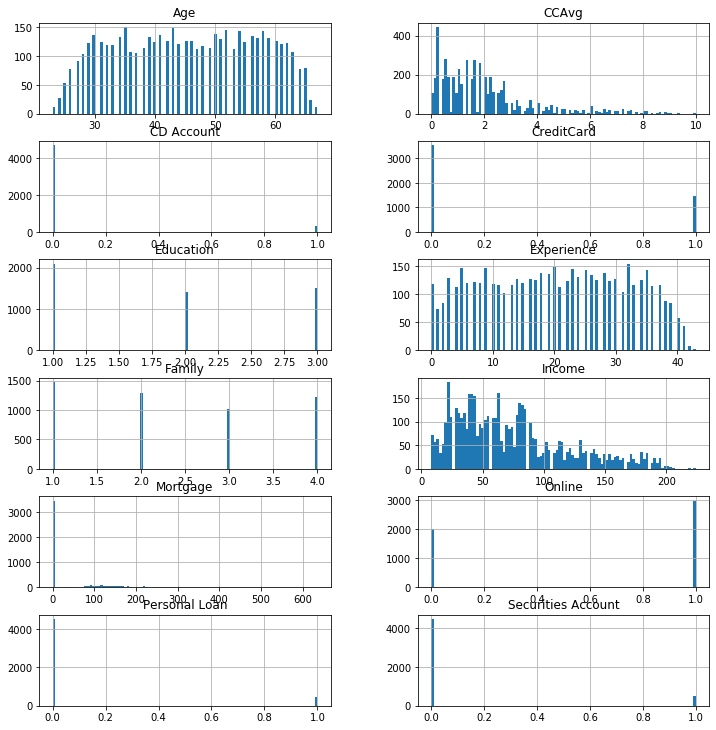

In [14]:
columns = list(bank_train) # Excluding Outcome column  
bank_train[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 
# To see Histogram of all individual data columns

In [15]:
bank_train.corr() # It will show correlation matrix between all attributes

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994198,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994198,1.000000,-0.046729,-0.052213,-0.049912,0.013536,-0.010840,-0.007858,-0.001111,0.010046,0.013975,0.008910
Income,-0.055269,-0.046729,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052213,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.049912,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013536,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010840,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007858,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001111,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010046,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


In [16]:
# To see correlation in graphical representation, below is function for that
def plot_corr(bank_train, size=10):
    corr = bank_train.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

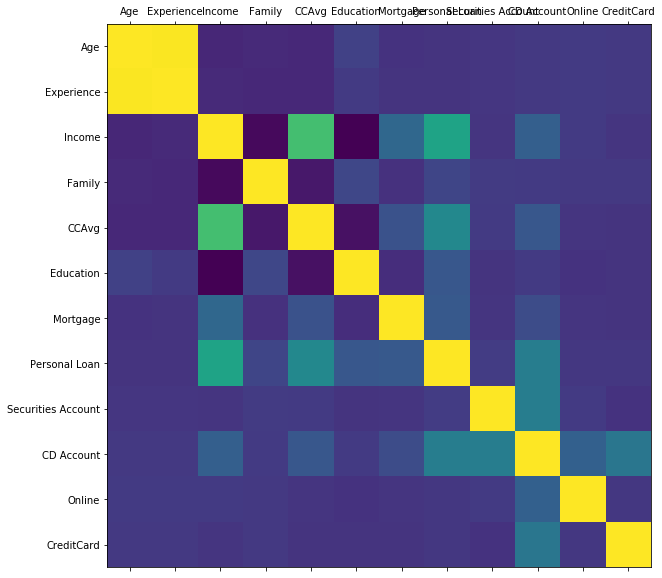

In [17]:
plot_corr(bank_train)

In above plot yellow colour represents maximum correlation and blue colour represents minimum correlation. We can see none of variable have correlation with any other variables. Except Age and Experience.

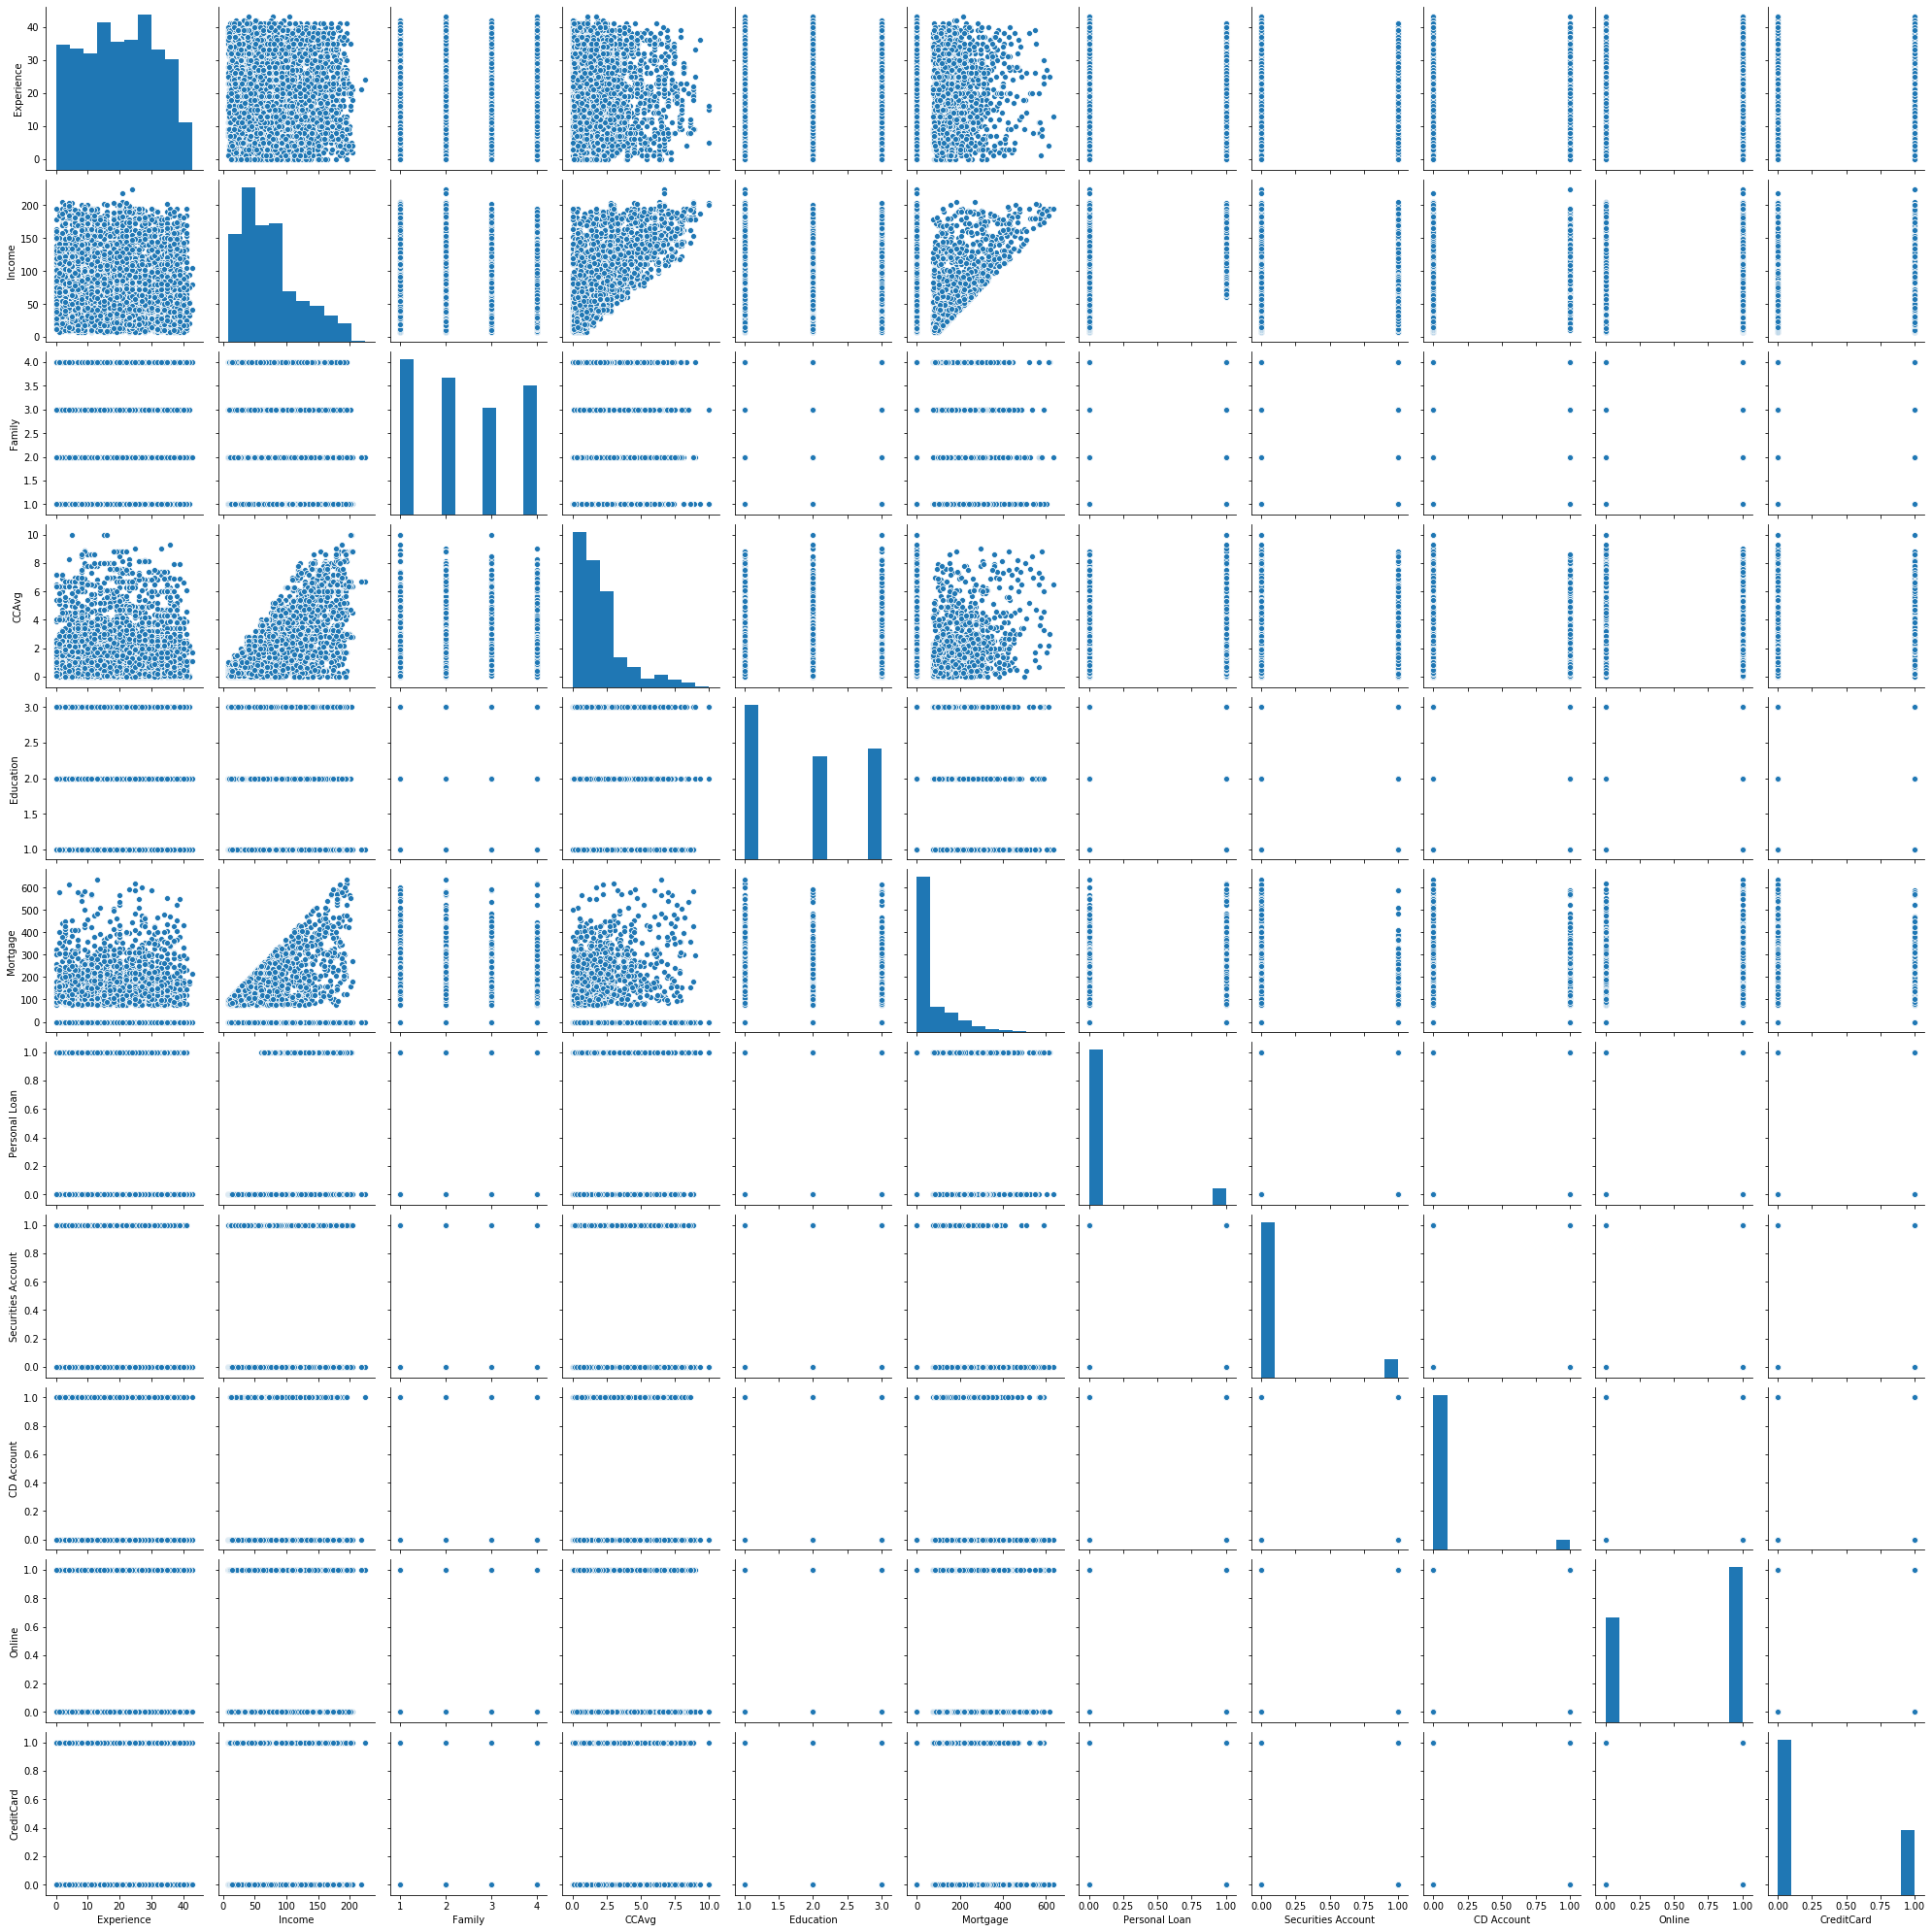

In [18]:
sns.pairplot(bank_train.iloc[:,1:])

Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age. We can confirm this by looking at the describe statement above, which shows mean is almost equal to median

Experience is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to median. There are negative values in the Experience. This could be a data input error as in general it is not possible to measure negative years of experience. We can delete these values, because we have 3 or 4 records from the sample.

Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median

CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K

Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K

The variables family and education are ordinal variables. The distribution of families is evenly distributes


The following code does the below steps:

For the record with the ID, get the value of Age column
For the record with the ID, get the value of Education column
Filter the records matching the above criteria from the data frame which has records with positive experience and take the median
Apply the median back to the location which had negative experience

In [19]:
# Let us look at the target column which is 'Personal Loan' to understand how the data is distributed amongst the various values
bank_train.groupby(["Personal Loan"]).mean()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,
0,45.367257,20.148894,66.237389,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,45.066667,19.843750,144.745833,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


In [20]:
#Convert X & Y variable to a categorical variable as relevant
bank_train['Personal Loan'] = bank_train['Personal Loan'].astype('category')
bank_train['Education'] = bank_train['Education'].astype('category')
bank_train['Securities Account'] = bank_train['Securities Account'].astype('category')
bank_train['CD Account'] = bank_train['CD Account'].astype('category')
bank_train['Online'] = bank_train['Online'].astype('category')
bank_train['CreditCard'] = bank_train['CreditCard'].astype('category')

In [21]:
bank_train.info() # This is the target column distribution, wherein all the datatypes have been handled as per requirement.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   int64   
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   category
 6   Mortgage            5000 non-null   int64   
 7   Personal Loan       5000 non-null   category
 8   Securities Account  5000 non-null   category
 9   CD Account          5000 non-null   category
 10  Online              5000 non-null   category
 11  CreditCard          5000 non-null   category
dtypes: category(6), float64(1), int64(5)
memory usage: 264.4 KB


In [22]:
#Calculate baseline proportion - ratio of Yes to No to identify data imbalance
prop_Y = bank_train['Personal Loan'].value_counts(normalize=True)
print(prop_Y)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64


There is a lot of imbalance in the data

In [23]:
# Define X and Y variables, Personal Loan is our Target Attribute, so same is dropped from X
X = bank_train.drop('Personal Loan', axis=1)
Y = bank_train['Personal Loan']

In [24]:
# To Split into training and test set in ratio of 70:30, Random state has been set to 1 for repeatability in results
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
x_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,47,22,35,2,1.3,1,0,0,0,1,0
4768,38,14,39,1,2.0,2,0,0,0,1,0
65,59,35,131,1,3.8,1,0,0,0,1,1
177,29,3,65,4,1.8,2,244,0,0,0,0
4489,39,13,21,3,0.2,2,0,0,0,1,0


In [25]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(bank_train.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(bank_train.index)) * 100))

70.00% data is in training set
30.00% data is in test set


Now lets check Personal Loan True/False ratio in split data

In [26]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(bank_train.loc[bank_train['Personal Loan'] == 1]), (len(bank_train.loc[bank_train['Personal Loan'] == 1])/len(bank_train.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(bank_train.loc[bank_train['Personal Loan'] == 0]), (len(bank_train.loc[bank_train['Personal Loan'] == 0])/len(bank_train.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4520 (90.40%)

Training Personal Loan True Values    : 331 (9.46%)
Training Personal Loan False Values   : 3169 (90.54%)

Test Personal Loan True Values        : 149 (9.93%)
Test Personal Loan False Values       : 1351 (90.07%)



## Apply ML Modal

**Decision Tress**

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

dt_model=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [37]:
dt_model.score(x_test , y_test)

0.972

In [35]:
y_predict = dt_model.predict(x_test)
y_predict[:5]

array([0, 0, 0, 0, 0], dtype=int64)

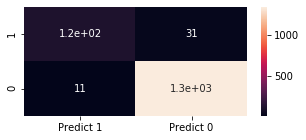

In [39]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (5,2))
sns.heatmap(df_cm, annot=True)

In [40]:
cm

array([[ 118,   31],
       [  11, 1340]], dtype=int64)

In [38]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(y_test, y_predict)
# empty list that will hold accuracy scores
ac_scores = []
#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
print(((TP+TN)*100)/(TP+TN+FP+FN))

#False Negative rate 
print((FN*100)/(FN+TP))

97.2
20.80536912751678


###### Logistic Regression

In [41]:
#Build the logistic regression model
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)

#predict on test
y_predict = model.predict(x_test)
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.399775  0.399195  0.048907  0.644518  0.162338  1.640048  0.000788   

          7         8         9        10  intercept  
0 -0.860433  3.212828 -0.571611 -0.989473  -2.489081  


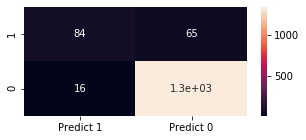

In [42]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (5,2))
sns.heatmap(df_cm, annot=True)

In [43]:
cm

array([[  84,   65],
       [  16, 1335]], dtype=int64)

In [44]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(y_test, y_predict)
# empty list that will hold accuracy scores
ac_scores = []
#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
print(((TP+TN)*100)/(TP+TN+FP+FN))

#False Negative rate 
print((FN*100)/(FN+TP))

94.6
43.624161073825505


The confusion matrix

True Positives (TP): we correctly predicted people with Personal Loan: 84

True Negatives (TN): we correctly predicted people without Personal Loan: 1335

False Positives (FP): we incorrectly predicted people who have Personal Loan (a "Type I error"): 16 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted people who do not have Personal Loan (a "Type II error"): 65 Falsely predict negative Type II error

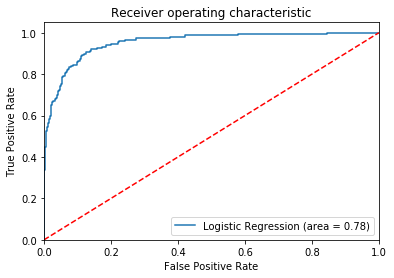

In [45]:
#AUC ROC curve
logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The ROC curve has better True Positive rate than False Positive Rate

In [46]:
auc_score = metrics.roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
round( float( auc_score ), 2 )

0.95

# Build KNN model

In [47]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [48]:
# Call Nearest Neighbour algorithm

NNH.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

**Evaluate Performance of kNN Model**

In [49]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(y_test, predicted_values)
# empty list that will hold accuracy scores
ac_scores = []
#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
print(((TP+TN)*100)/(TP+TN+FP+FN))

#False Negative rate 
print((FN*100)/(FN+TP))

NameError: name 'predicted_values' is not defined

Confusion Matrix


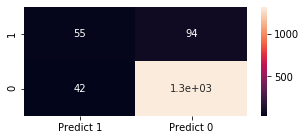

In [42]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in [1,0]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (5,2))
sns.heatmap(df_cm, annot=True)

In [38]:
cm

array([[  55,   94],
       [  42, 1309]], dtype=int64)

In [59]:
# cross validation
#Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from the above list using the Mis 
#classification error

In [43]:
# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [44]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    # predict the response
    y_pred = knn.predict(x_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 9


In [45]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(y_test, y_pred)
# empty list that will hold accuracy scores
ac_scores = []
#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
print(((TP+TN)*100)/(TP+TN+FP+FN))

#False Negative rate 
print((FN*100)/(FN+TP))

90.4
73.15436241610739


In [46]:
#Plot misclassification error vs k (with k value on X-axis) using matplotlib.

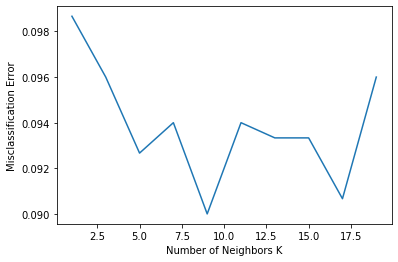

In [46]:
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [47]:
#Use k=9 as the final model for prediction
knn = KNeighborsClassifier(n_neighbors = 9)

# fitting the model
knn.fit(x_train, y_train)

# predict the response
y_pred = knn.predict(x_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.91


NameError: name 'recall_score' is not defined

In [48]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(y_test, y_predict)
# empty list that will hold accuracy scores
ac_scores = []
#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
print(((TP+TN)*100)/(TP+TN+FP+FN))

#False Negative rate 
print((FN*100)/(FN+TP))

94.6
43.624161073825505


**The KNN model has a good accuracy as well as recall score**

# Train Naive Bayes model

In [50]:
# create the model
NBmodel = GaussianNB()

NBmodel.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Now GaussianNB classifier is built. The classifier is trained using training data. We can use fit() method for training it. After building a classifier, our model is ready to make predictions. We can use predict() method with test set features as its parameters.

In [51]:
y_pred = NBmodel.predict(x_test)

Confusion Matrix


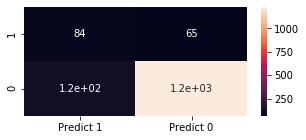

In [54]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in [1,0]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (5,2))
sns.heatmap(df_cm, annot=True)

In [55]:
cm

array([[  84,   65],
       [ 123, 1228]], dtype=int64)

In [53]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(y_test, y_pred)
# empty list that will hold accuracy scores
ac_scores = []
#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
print(((TP+TN)*100)/(TP+TN+FP+FN))

#False Negative rate 
print((FN*100)/(FN+TP))

87.46666666666667
43.624161073825505


# Conclusion:

After comparing the outputs generated by all the 3 models, the Accuracy given are as follows:

Logistic Regression - 94.6%  (Sum of FP+FN = 81)

KNN                 - 91%    (Sum of FP+FN = 136)

NB                  - 87.46% (Sum of FP+FN = 188)

Hence Logistic Regression is the best model for this case & it performs better than others as above accuracy & respective findings from Confusion Matrix.